In [14]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction, get_peaks_info

In [ ]:
save_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)

J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)

fig, axs = plt.subplots(13,13, figsize = (25, 25))
fig.tight_layout(pad=0.5)
fig.suptitle(rf'Local Packing Fraction Histograms - $\phi={phi:.2e}, v_0={v0:.2e}$', fontsize = 24)

for J_index, J in enumerate(J_vals):
    for Dr_index, Dr in enumerate(Dr_vals):
        #Load data
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
            local_packing_fraction = np.load(local_packing_file)
        peaks_indices, bin_centers = get_peaks_info(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
        bin_edges = edges_from_centers_linear(bin_centers)
        y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
        for peak_index in peaks_indices:
            axs[-Dr_index-1, J_index].vlines(bin_centers[peak_index], ymin=0, ymax=y.max(), color='red')
        if J_index == 0:
            axs[-Dr_index-1, J_index].set_ylabel(r'$D_r = $' + f'{Dr:.2e}', fontsize = 15)
        if Dr_index == len(Dr_vals)-1:
            axs[-Dr_index-1, J_index].set_title(f"J = {J:.2e}", fontsize = 15)
base_filename = os.path.join(save_dir, exp_folder_name, 'phase_diagrams', "packing_fraction_histograms.pdf")
plt.subplots_adjust(top=0.95)
#save_fig_pdf(base_filename)

# Make plots inside plots for raw curves

In [ ]:
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"

phi_vals = [0.2, 0.4, 0.6, 0.8, 1]
v0_vals = [0.01, 0.03, 0.1]
J_vals = np.logspace(-3, 0, num=4)
Dr_vals = np.logspace(-3, 0, num=4)

fig = plt.figure(figsize=(25, 25))
outer_grid = fig.add_gridspec(len(phi_vals), len(v0_vals), wspace=0.15, hspace=0.15)

for phi_index, phi in enumerate(phi_vals):
    for v0_index, v0 in enumerate(v0_vals):
        # gridspec inside gridspec
        inner_grid = outer_grid[phi_index, v0_index].subgridspec(len(Dr_vals), len(J_vals), wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for J_index, J in enumerate(J_vals):
            for Dr_index, Dr in enumerate(Dr_vals):
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
                with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
                    local_packing_fraction = np.load(local_packing_file)
                peaks_indices, bin_centers = get_peaks_info(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
                bin_edges = edges_from_centers_linear(bin_centers)
                y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
                axs[-Dr_index-1, J_index].set_xlim(0, 1.3)
                for peak_index in peaks_indices:
                    axs[-Dr_index-1, J_index].vlines(bin_centers[peak_index], ymin=0, ymax=y.max(), color='red')
                if Dr_index != 0:
                    axs[-Dr_index-1, J_index].set(xticks=[])
                if J_index != 0:
                    axs[-Dr_index-1, J_index].set(yticks=[])
                if Dr_index == len(Dr_vals)-1:
                    axs[-Dr_index-1, J_index].set_title(rf'$J = {J:.2e}$')
                if J_index == 0:
                    axs[-Dr_index-1, J_index].set_ylabel(rf'$D_r = {Dr:.2e}$')

fig.suptitle(rf'Polar Alignment - Local Packing Fraction Histograms', fontsize = 24)
plt.subplots_adjust(top=0.95)
#save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_fraction_histograms.pdf'))
plt.show()

In [ ]:
"""
times = np.linspace(0, 5e5, num=1000)[1:]
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"

phi_vals = [0.4, 0.6, 0.8, 1]
v0_vals = [0.01, 0.03]
Jv_vals = np.logspace(-3, 0, num=4)
Dr_vals = np.logspace(-3, 0, num=4)

fig = plt.figure(figsize=(20, 45))
outer_grid = fig.add_gridspec(len(phi_vals), len(v0_vals), wspace=0.15, hspace=0.15)

for phi_index, phi in enumerate(phi_vals):
    for v0_index, v0 in enumerate(v0_vals):
        # gridspec inside gridspec
        inner_grid = outer_grid[phi_index, v0_index].subgridspec(len(Dr_vals), len(Jv_vals), wspace=0.25, hspace=0.25)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for J_index, Jv in enumerate(Jv_vals):
            for Dr_index, Dr in enumerate(Dr_vals):
                J = Jv / v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
                msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
                #Plot MSD
                if os.path.isfile(msd_normal_filename):
                    with open(msd_normal_filename, 'rb') as msd_normal_file:
                        msd_normal = np.load(msd_normal_file)
                    axs[-Dr_index-1, J_index].plot(times, msd_normal)
                #Plot slope 1 line
                slope_1_line = (msd_normal[0]/times[0]) * times
                axs[-Dr_index-1, J_index].plot(times, slope_1_line, color='black', linestyle='--')
                #Plot slope 2 line
                slope_2_line = (msd_normal[0]/times[0]**2) * times**2
                axs[-Dr_index-1, J_index].plot(times, slope_2_line, color='red', linestyle = '--')
                #Plot MSD = 1 cutoff
                axs[-Dr_index-1, J_index].plot(times, np.full_like(times, 1), color='green', linestyle = '--')

                axs[-Dr_index-1, J_index].set_xscale('log')
                axs[-Dr_index-1, J_index].set_yscale('log')
                if Dr_index != 0:
                    axs[-Dr_index-1, J_index].set(xticks=[])
                if Dr_index == len(Dr_vals)-1:
                    axs[-Dr_index-1, J_index].set_title(rf'$Jv_0 = {Jv:.2e}$')
                if J_index == 0:
                    axs[-Dr_index-1, J_index].set_ylabel(rf'$D_r = {Dr:.2e}$')

fig.suptitle(rf'Velocity Alignment - MSD Minus Flocking', fontsize = 24)
plt.subplots_adjust(top=0.96)
#save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'normal_msd_minus_avg.pdf'))
plt.show()
"""

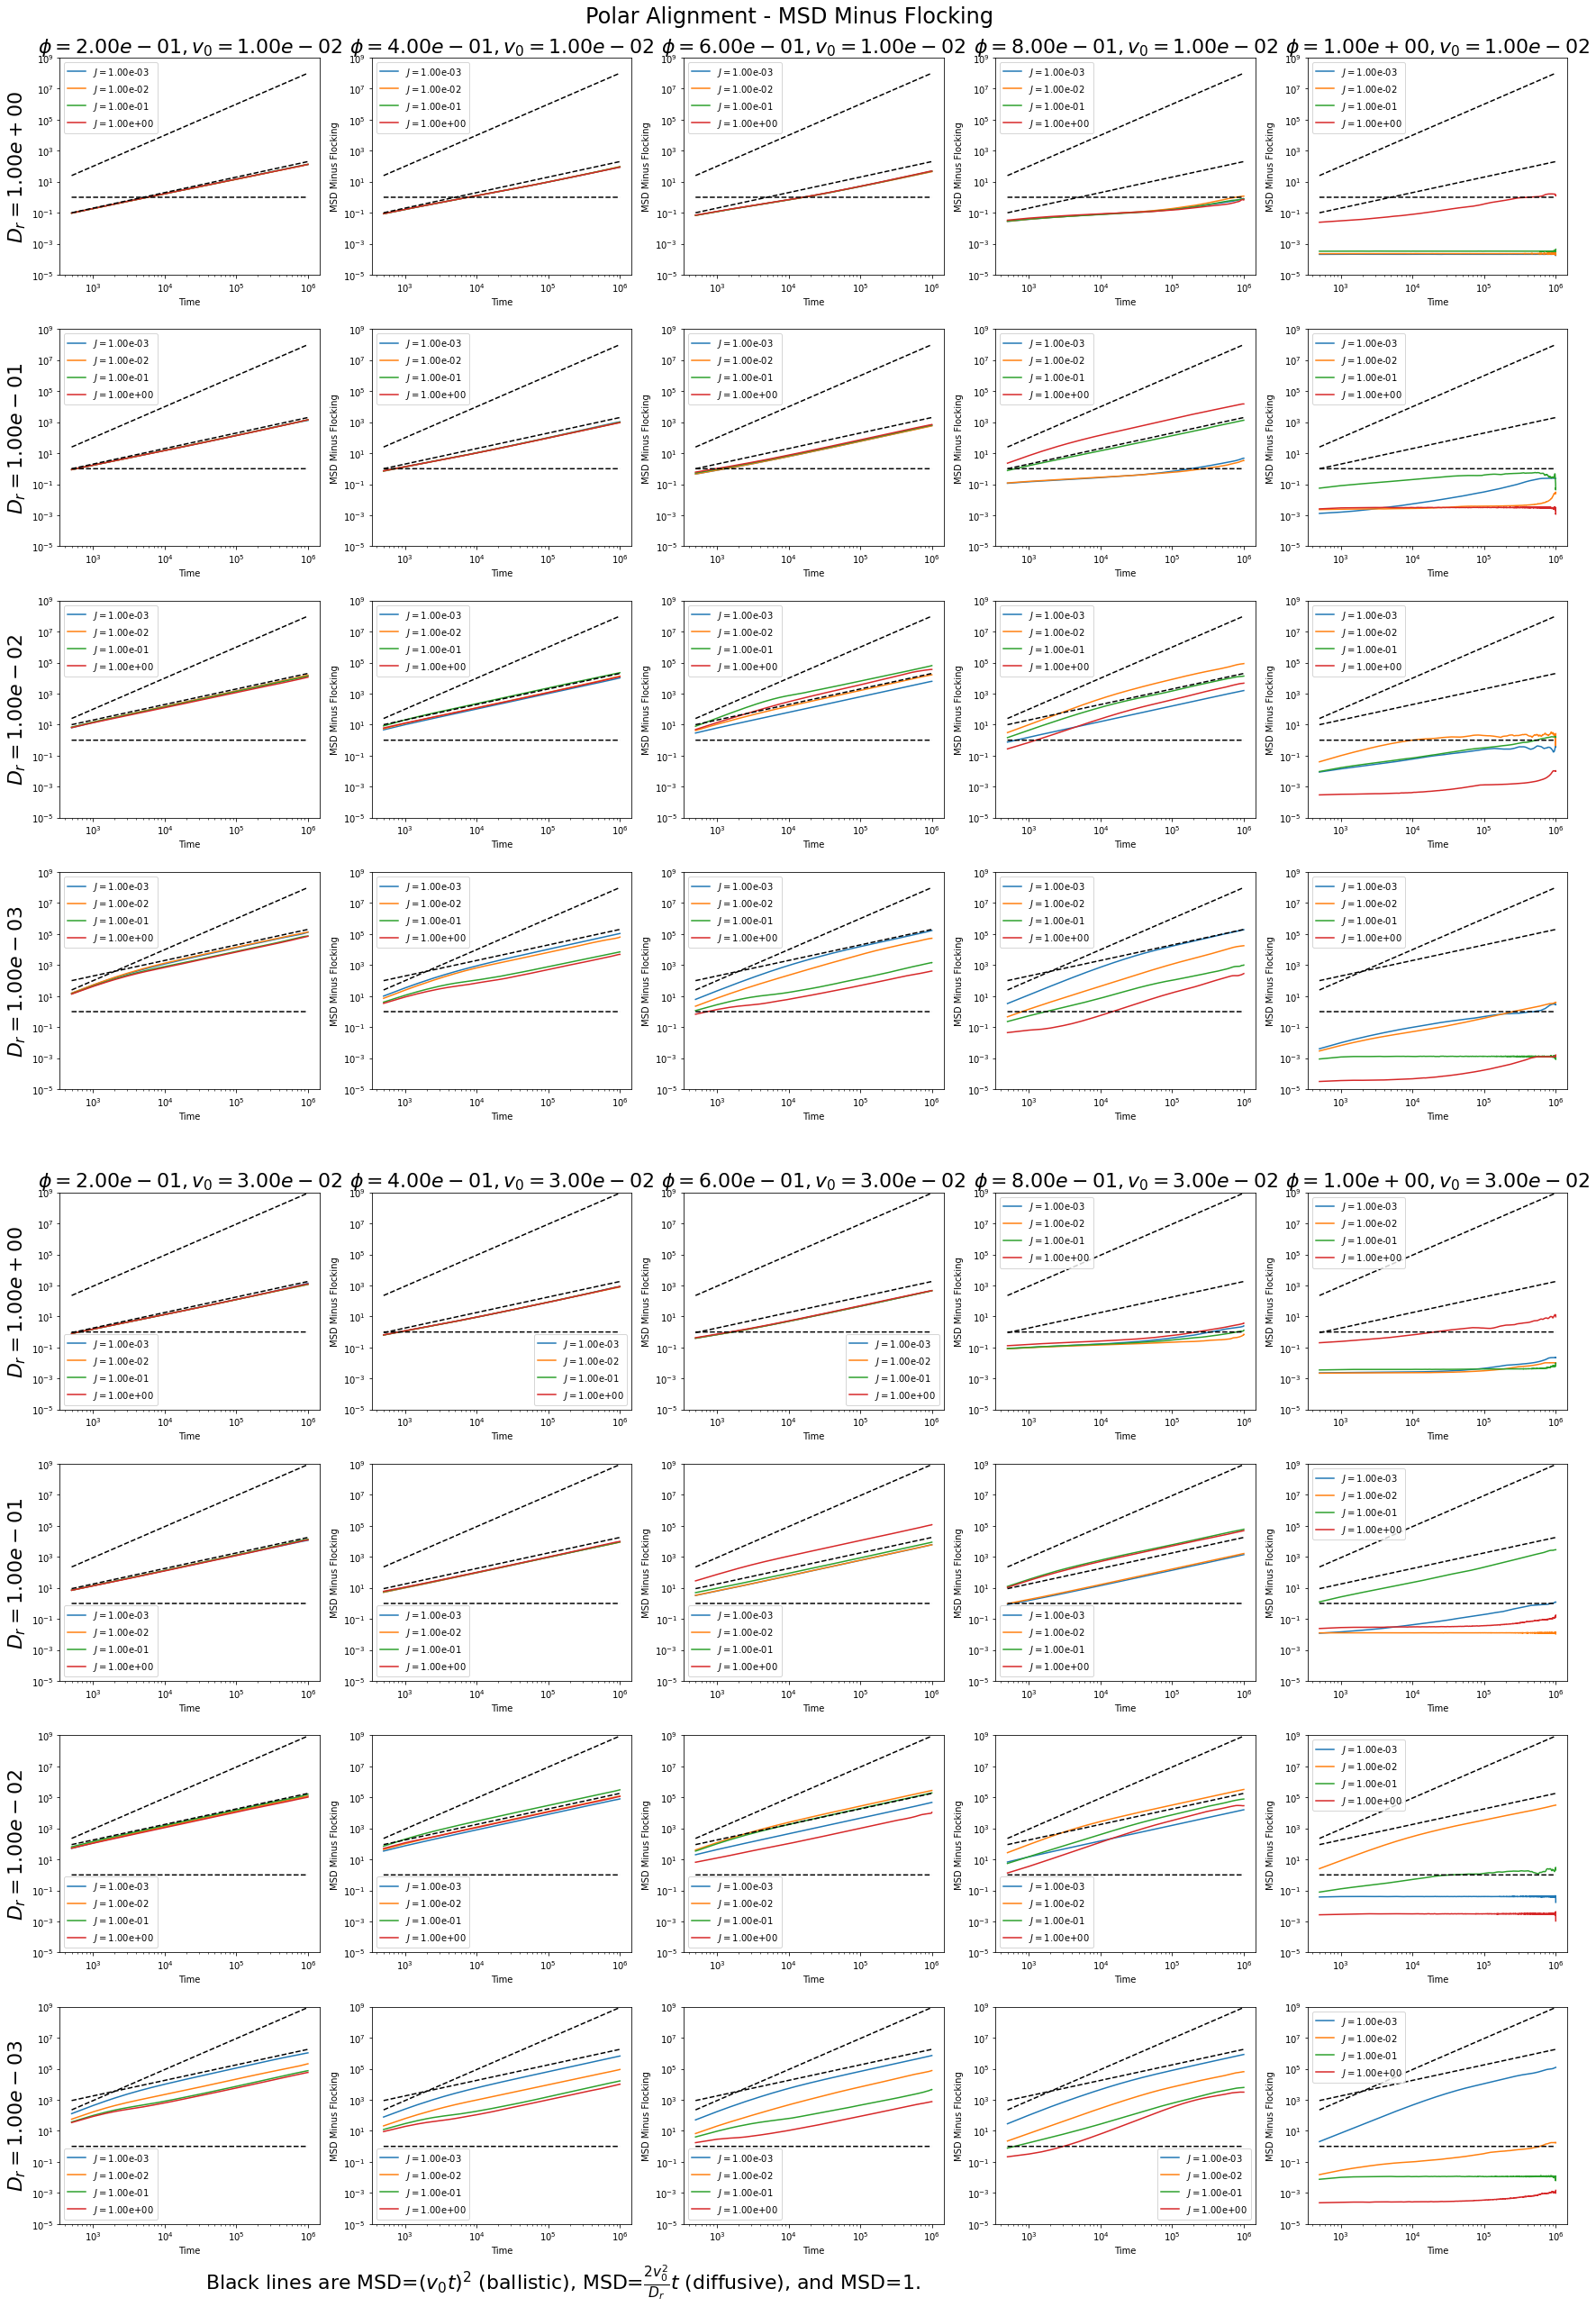

In [6]:

Dr_vals = np.logspace(-3, 0, num=4)

fig = plt.figure(figsize=(30, 40))
outer_grid = fig.add_gridspec(len(v0_vals), len(phi_vals), wspace=0.2, hspace=0.1)
times = np.linspace(0, 1e6, num=2000)[1:]
save_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"

phi_vals = [0.2, 0.4, 0.6, 0.8, 1]
v0_vals = [0.01, 0.03]
J_vals = np.logspace(-3, 0, num=4)
for phi_index, phi in enumerate(phi_vals):
    for v0_index, v0 in enumerate(v0_vals):
        # gridspec inside gridspec
        inner_grid = outer_grid[v0_index, phi_index].subgridspec(len(Dr_vals), 1, wspace=0.25, hspace=0.25)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for Dr_index, Dr in enumerate(Dr_vals):
            for J_index, J in enumerate(J_vals):
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
                msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
                #Plot MSD
                if os.path.isfile(msd_normal_filename):
                    with open(msd_normal_filename, 'rb') as msd_normal_file:
                        msd_normal = np.load(msd_normal_file)
                    axs[-Dr_index-1].plot(times, msd_normal, label=rf'$J=${J:.2e}')
            #Plot slope 1 line
            slope_1_line = 2*(v0**2 / Dr)*times
            axs[-Dr_index-1].plot(times, slope_1_line, color='black', linestyle='--')
            #Plot slope 2 line
            slope_2_line = v0**2 * times**2
            axs[-Dr_index-1].plot(times, slope_2_line, color='black', linestyle='--')
            #Plot MSD = 1 cutoff
            axs[-Dr_index-1].plot(times, np.full_like(times, 1), color='black', linestyle='--')
            axs[-Dr_index-1].set_xlabel('Time')
            axs[-Dr_index-1].set_xscale('log')
            axs[-Dr_index-1].set_yscale('log')
            axs[-Dr_index-1].set_ylim(1e-5, 1e9)
            if Dr_index == len(Dr_vals)-1:
                axs[-Dr_index-1].set_title(rf'$\phi = {phi:.2e}, v_0 = {v0:.2e}$', fontsize=22)
            if phi_index == 0:
                axs[-Dr_index-1].set_ylabel(rf'$D_r = {Dr:.2e}$', fontsize=22)
            else:
                axs[-Dr_index-1].set_ylabel('MSD Minus Flocking')
            axs[-Dr_index-1].legend()
fig.suptitle(rf'Polar Alignment - MSD Minus Flocking', fontsize = 24)
plt.subplots_adjust(top=0.96)
plt.text(0.2, 0.1, r'Black lines are MSD=$(v_0 t)^2$ (ballistic), MSD=$\frac{2v_0^2}{D_r}t$ (diffusive), and MSD=1.', fontsize=22, transform=plt.gcf().transFigure)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'normal_msd_minus_avg.pdf'))
plt.show()